<a href="https://colab.research.google.com/github/jarminett/Statistical_Learning_II/blob/main/Practica03/Practica03_071008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDAD GALILEO** \\
Instituto de Investigación de Operaciones \\
Posgrado en Análisis y Predicción de Datos \\
Luis Florian, 0710082, sección U \\

**Practica 3**

Maldición de dimensionalidad:
* Usando el dataset de precios de casas
* Usar PolynomialFeatures de sklearn para calcular features polinómicas y analizar la dimensionalidad resultante al usar polinomios de grado 1(no transformación),2,3 para 1,2,3 variables de entrada(cualquiera)
* No se necesita entrenar ningún modelo, solo analizar el comportamiento del número de dimensiones(por ejemplo usando plots comparativos)


### **Importing Libraries**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot


### **Loading Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [10]:
data = np.load("/content/drive/MyDrive/MyNotebooks/Data Science Msc/Statistical Learning II/Lab03/dataset.npy")
df = pd.DataFrame(data,columns=['SalePrice','OverallQual','firstFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
columns=['SalePrice','OverallQual','firstFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

### **Exploring Data**

In [11]:
df.isna().sum()

SalePrice         0
OverallQual       0
firstFlrSF        0
TotRmsAbvGrd      0
YearBuilt         0
LotFrontage     259
dtype: int64

### **Imputation**

In [12]:
df['LotFrontage'].fillna((df['LotFrontage'].mean()), inplace=True)
df.isna().sum()

SalePrice       0
OverallQual     0
firstFlrSF      0
TotRmsAbvGrd    0
YearBuilt       0
LotFrontage     0
dtype: int64

In [34]:
df

,SalePrice,OverallQual,firstFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


### **Polinomios**

Por razones de investigación y propia curiosidad, en lugar de utilizar grados de polinomio de 1 a 3 como indica el ejercicio, se harán de 1 a 10.

Grado de Polinomio: 1, Features: 7
Grado de Polinomio: 2, Features: 28
Grado de Polinomio: 3, Features: 84
Grado de Polinomio: 4, Features: 210
Grado de Polinomio: 5, Features: 462
Grado de Polinomio: 6, Features: 924
Grado de Polinomio: 7, Features: 1716
Grado de Polinomio: 8, Features: 3003
Grado de Polinomio: 9, Features: 5005
Grado de Polinomio: 10, Features: 8008




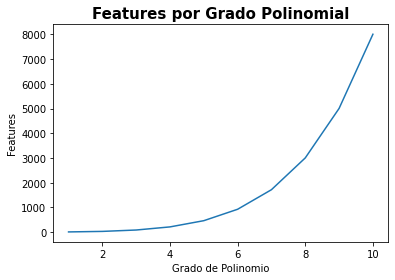

In [43]:
font = {'family': 'DejaVu Sans',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }

num_features = list()
degress = [i for i in range(1, 11)]
for d in degress:
    # create transform
    trans = PolynomialFeatures(degree=d)
    # fit and transform
    data = trans.fit_transform(df)
    # record number of features
    num_features.append(data.shape[1])
    # summarize
    print('Grado de Polinomio: %d, Features: %d' % (d, data.shape[1]))
# plot degree vs number of features
print("\n")
pyplot.plot(degress, num_features)
pyplot.xlabel("Grado de Polinomio")
pyplot.ylabel("Features")
pyplot.title("Features por Grado Polinomial",fontdict=font)

pyplot.show()

### **Conclusiones**

* Tal como vimos en clase, la maldición de la dimensionalidad nos impone que mientras más dimensiones tenemos, más completo es el problema.  El crecimiento tal como se observa en la gráfica es exponencial. Esto es porque al contemplar más dimensiones, más features tenemos.

* Tal como se indica en la parte de Polinomios, se experimentó hasta el grado 10 en lugar de 3 como el ejercicio lo indica.  El resultado es esta gráfica en donde se puede observar que la relación entre dimensión y crecimiento de features es exponencial.
